In [4]:
from collections import defaultdict
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw, ImageFont, ImageColor
import xml.etree.ElementTree as ET

GSV_IMAGE_WIDTH  = 13312
GSV_IMAGE_HEIGHT = 6656

In [5]:
path_to_labels = '../seattle-labels.csv'
path_to_scrapes = '/mnt/g/scrapes_dump_seattle/'

In [26]:
def get_img(pano_id):
    imgpath = os.path.join(path_to_scrapes, pano_id[:2], pano_id+'.jpg')
    return Image.open(imgpath, 'r')

def get_labels(pano_id):
    labels = defaultdict(set)
    with open(path_to_labels) as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['gsv_panorama_id'] != pano_id:
                continue
            x, y= float(row['sv_image_x']), float(row['sv_image_y'])
            label_type = int(row['label_type_id'])
            photog_heading = float(row['photagrapher_heading'])
            
            labels[label_type].add((x,y, photog_heading))
    print "Got {} labels for {}".format(len(labels), pano_id)
    return labels
            
            
            

In [27]:
get_labels('LVbKACFUqHL0i5ALf0P41Q')

Got 2 labels for LVbKACFUqHL0i5ALf0P41Q


defaultdict(set,
            {1: {(8634.0, -298.0, 320.4672241211),
              (10058.0, -383.0, 320.4672241211)},
             2: {(105.0, -1302.0, 320.4672241211),
              (1909.0, -1664.0, 320.4672241211),
              (5981.0, -598.0, 320.4672241211),
              (6530.0, -385.0, 320.4672241211),
              (8147.0, -279.0, 320.4672241211),
              (10554.0, -510.0, 320.4672241211)}})

In [52]:
def show_pano(pano_id, shift=0):
    label_to_color = {1:'b', 2:'g', 3:'r', 4:'y'}
    
    img_array = np.asarray(get_img(pano_id))
    
    feats = get_labels(pano_id)
    xs, ys, cs = [], [], []
    for label_type, labels in feats.items():
        for sv_x,sv_y,ph in labels:
            pyd = 180-ph
            
            sv_y=3*sv_y
            

            x = ((float(pyd) / 360) * GSV_IMAGE_WIDTH + sv_x) % GSV_IMAGE_WIDTH
            y = GSV_IMAGE_HEIGHT / 2 - sv_y

            xs.append(GSV_IMAGE_WIDTH-x)
            ys.append(y)

            cs.append(label_to_color[label_type])
    
    plt.figure(figsize=(30,15))
    plt.scatter(xs, ys, c=cs)
    plt.imshow(img_array)
    plt.xlim=13312
    plt.ylim=6656
    plt.title(pano_id)
    plt.show()

Got 2 labels for LVbKACFUqHL0i5ALf0P41Q


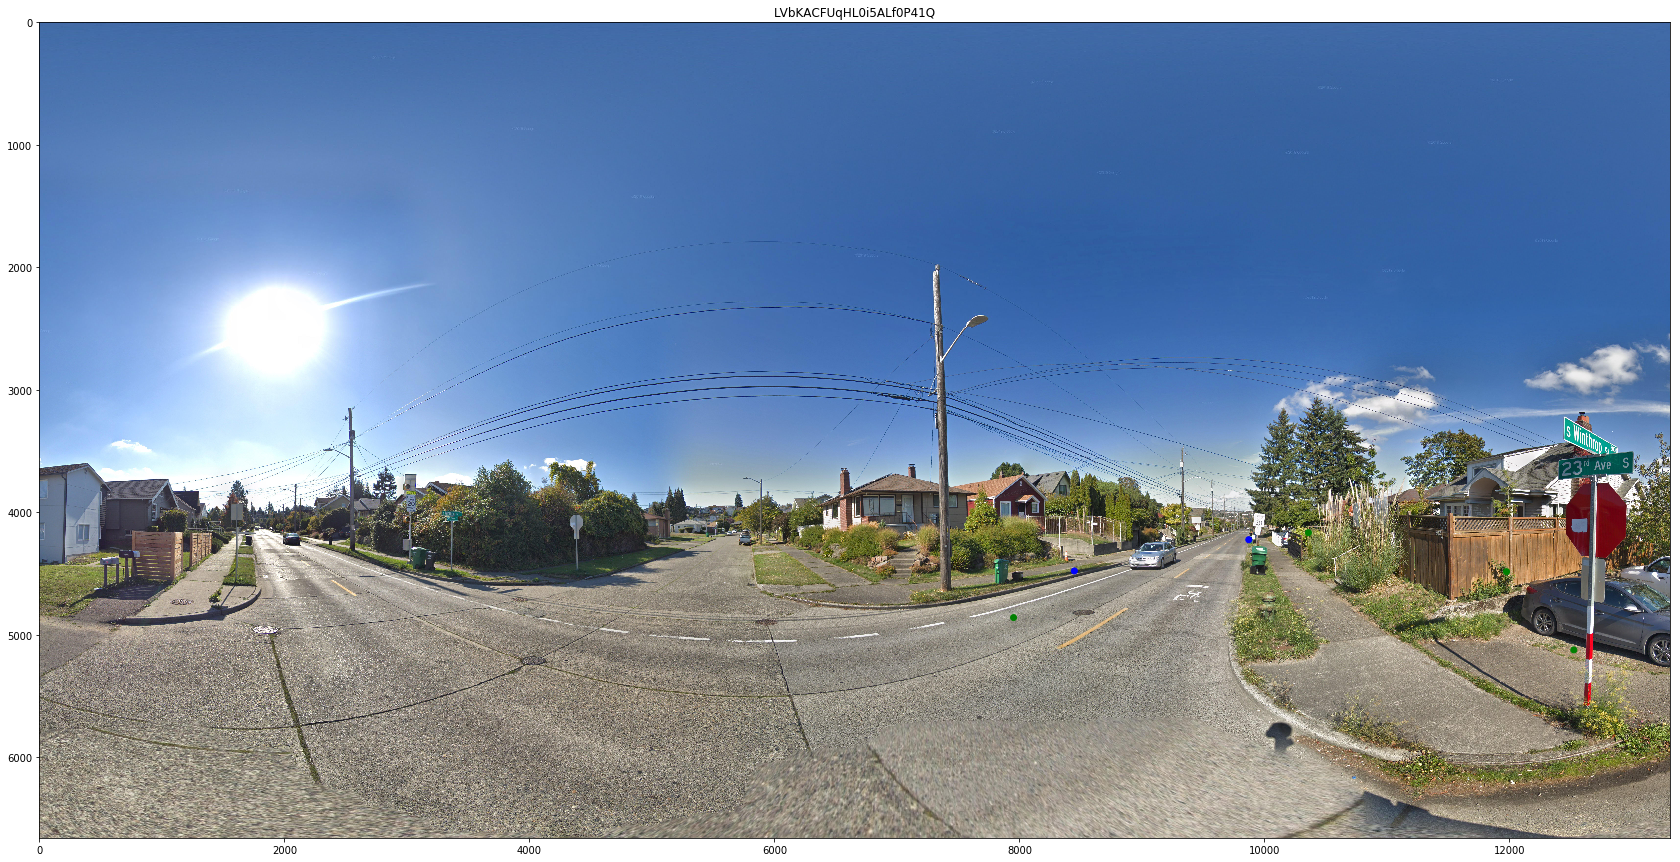

In [53]:
show_pano('LVbKACFUqHL0i5ALf0P41Q')